In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy,matplotlib,seaborn

Sebastian Raschka 

CPython 3.6.1
IPython 6.0.0

numpy 1.12.1
matplotlib 2.0.2
seaborn 0.7.1


# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

## Histogram

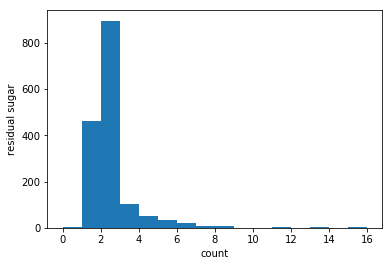

In [3]:
# read dataset
df = pd.read_csv('../datasets/winequality/winequality-red.csv',
                 sep=';')

# create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)
fig = plt.hist(df['residual sugar'], bins=bin_edges)

# add plot labels
plt.xlabel('count')
plt.ylabel('residual sugar')
plt.show()

## Scatterplot

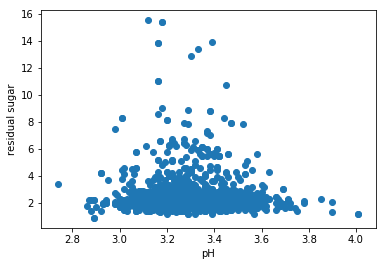

In [4]:
# create scatterplot
fig = plt.scatter(df['pH'], df['residual sugar'])

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Scatterplot Matrix

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

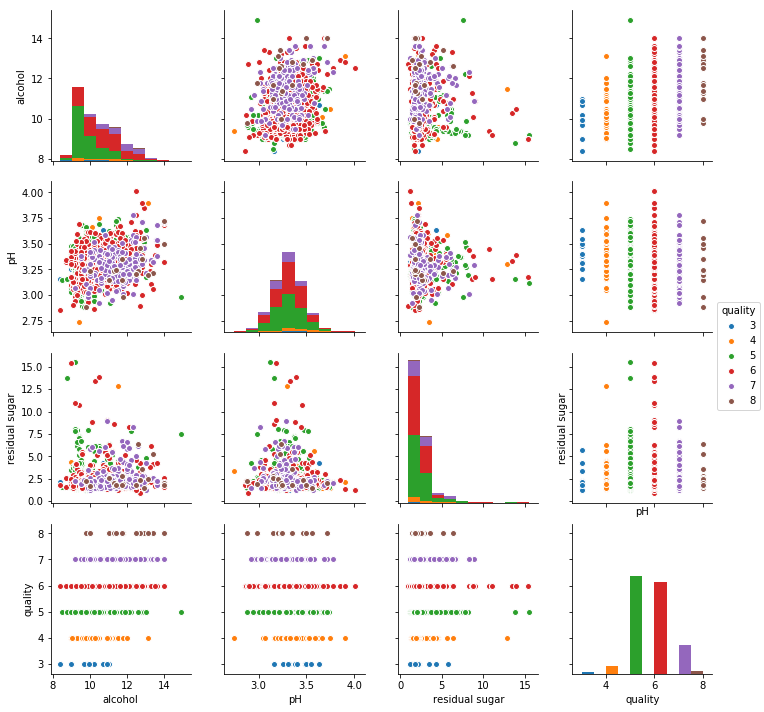

In [6]:
# create scatterplot matrix
fig = sns.pairplot(data=df[['alcohol', 'pH', 'residual sugar', 'quality']], 
                   hue='quality')

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Bee Swarm Plot

- useful for small datasets but can be slow on large datasets

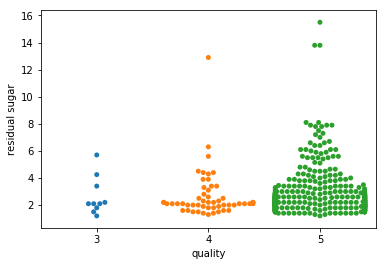

In [7]:
# create bee swarm plot
sns.swarmplot(x='quality', y='residual sugar', 
              data=df[df['quality'] < 6])
plt.show()

## Empirical Cumulative Distribution Function Plots

92.18 percent have 4 or less units residual sugar


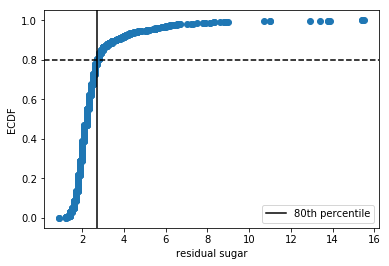

In [8]:
# sort and normalize data
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

# create ecd fplot
plt.plot(x, y, marker='o', linestyle='')


# add plot labels
plt.ylabel('ECDF')
plt.xlabel('residual sugar')

percent_four_or_less = y[x <= 4].max()
print('%.2f percent have 4 or less units residual sugar' % 
      (percent_four_or_less*100))

eightieth_percentile = x[y <= 0.8].max()

plt.axhline(0.8, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='80th percentile')
plt.legend()
plt.show()

## Boxplots

- Distribution of data in terms of median and percentiles (median is the 50th percentile)

In [9]:
percentiles = np.percentile(df['alcohol'], q=[25, 50, 75])
percentiles

array([  9.5,  10.2,  11.1])

manual approach:

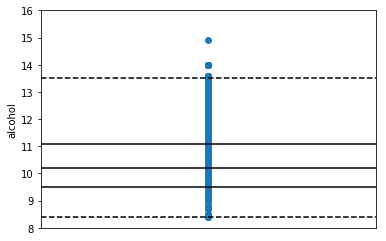

In [10]:
for p in percentiles:
    plt.axhline(p, color='black', linestyle='-')
plt.scatter(np.zeros(df.shape[0]) + 0.5, df['alcohol'])

iqr = percentiles[-1] - percentiles[0]
upper_whisker =  min(df['alcohol'].max(), percentiles[-1] + iqr * 1.5)
lower_whisker = max(df['alcohol'].min(), percentiles[0] - iqr * 1.5)
plt.axhline(upper_whisker, color='black', linestyle='--')
plt.axhline(lower_whisker, color='black', linestyle='--')

plt.ylim([8, 16])
plt.ylabel('alcohol')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

using matplotlib.pyplot.boxplot:

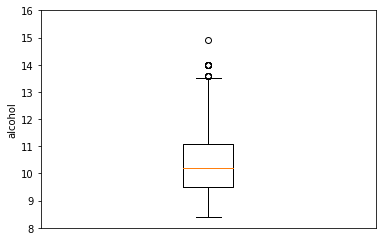

In [11]:
plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alcohol')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

## Violin Plots

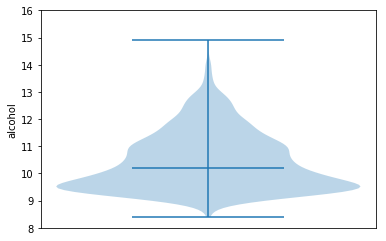

In [12]:
plt.violinplot(df['alcohol'], [0], 
               points=100, 
               bw_method='scott',
               showmeans=False, 
               showextrema=True, 
               showmedians=True)

plt.ylim([8, 16])
plt.ylabel('alcohol')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()